# Online Payments Fraud Detection





## visualizing and analyzing the data

### activity1: Importing Libraries¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

### activity2:  Reading the csv data

In [4]:
# Reading the csv data
df = pd.read_csv(r'/content/PS_20174392719_1491204439457_logs.csv')

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1,0
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1,0
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1,0
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1,0


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.drop(['isFlaggedFraud'],axis = 1, inplace = True)

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,1
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,1
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,1
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,1


### About Dataset

#### The below column reference:

##### 1.step: represents a unit of time where 1 step equals 1 hour

##### 2.type: type of online transaction

##### 3.amount: the amount of the transaction

##### 4.nameOrig: customer starting the transaction

##### 5.oldbalanceOrg: balance before the transaction

##### 6.newbalanceOrig: balance after the transaction

##### 7.nameDest: recipient of the transaction

##### 8.oldbalanceDest: initial balance of recipient before the transaction

##### 9.newbalanceDest: the new balance of recipient after the transaction

##### 10.isFraud: fraud transaction

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
2429,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [11]:

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## Checking for correlation¶

In [14]:
# checking for correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.352348,0.139868,-0.194391,-0.053366,-0.001745,0.788370
amount,0.352348,1.000000,0.703566,-0.023694,0.030711,0.274788,0.354960
oldbalanceOrg,0.139868,0.703566,1.000000,0.685439,0.075271,0.212087,0.105713
newbalanceOrig,-0.194391,-0.023694,0.685439,1.000000,0.127352,0.077034,-0.250987
oldbalanceDest,-0.053366,0.030711,0.075271,0.127352,1.000000,0.811400,-0.063175
newbalanceDest,-0.001745,0.274788,0.212087,0.077034,0.811400,1.000000,-0.015916
isFraud,0.788370,0.354960,0.105713,-0.250987,-0.063175,-0.015916,1.000000


## Heatmap

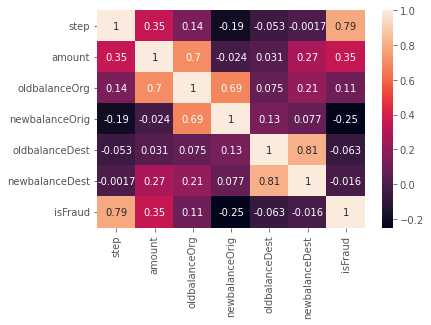

In [15]:
sns.heatmap(df.corr(),annot=True)

### activity3: Univariate analysis

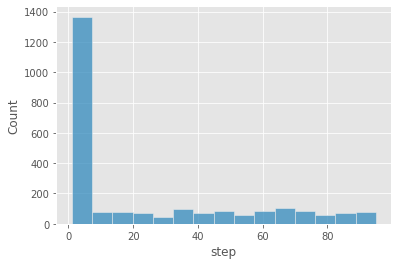

In [16]:
#step
sns.histplot(data=df,x='step')

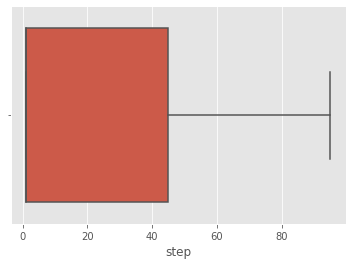

In [17]:
sns.boxplot(data=df,x='step')

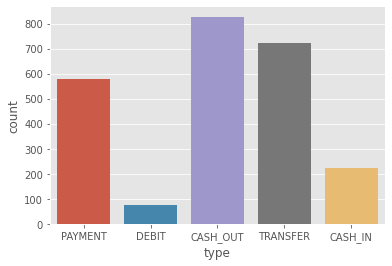

In [18]:
#type
sns.countplot(data=df,x='type')

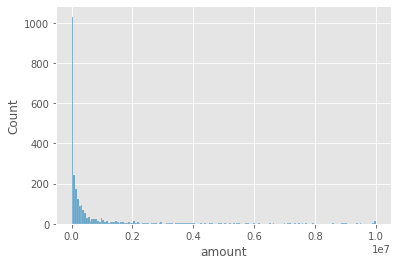

In [19]:
#amount
sns.histplot(data=df,x='amount')

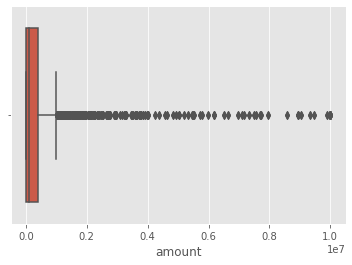

In [20]:
#amount
sns.boxplot(data=df,x='amount')

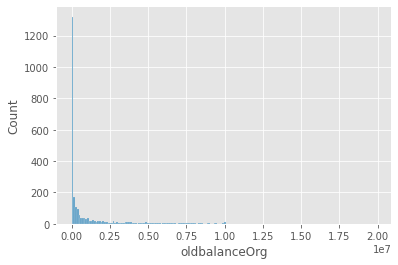

In [21]:
#oldbalanceOrg
sns.histplot(data=df,x='oldbalanceOrg')

In [22]:
#nameDest
df['nameDest'].value_counts()

C1590550415    25
C985934102     22
C564160838     19
C451111351     17
C1023714065    15
               ..
M1113829504     1
M936219350      1
M178401052      1
M1888639813     1
C757947873      1
Name: nameDest, Length: 1870, dtype: int64

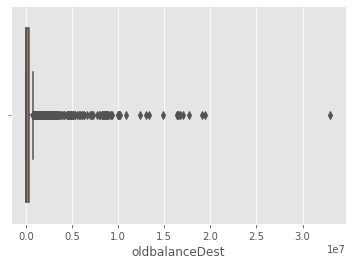

In [23]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

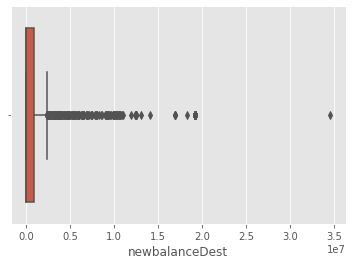

In [24]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

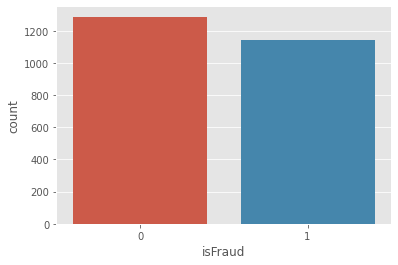

In [25]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [26]:
df['isFraud'].value_counts()

0    1288
1    1142
Name: isFraud, dtype: int64

In [27]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'


In [28]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,is not Fraud
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
2425,95,CASH_OUT,56745.14,C526144262,56745.14,0.00,C79051264,51433.88,108179.02,is Fraud
2426,95,TRANSFER,33676.59,C732111322,33676.59,0.00,C1140210295,0.00,0.00,is Fraud
2427,95,CASH_OUT,33676.59,C1000086512,33676.59,0.00,C1759363094,0.00,33676.59,is Fraud
2428,95,TRANSFER,87999.25,C927181710,87999.25,0.00,C757947873,0.00,0.00,is Fraud


### activity4: Bivariate analysis

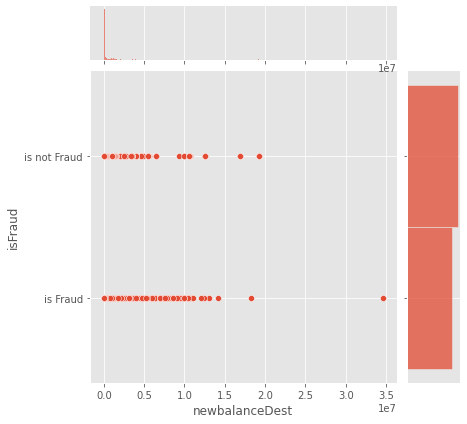

In [29]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

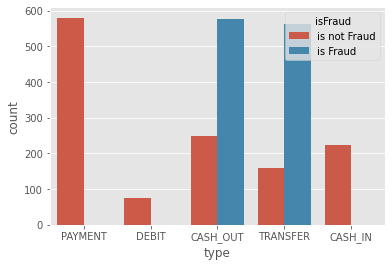

In [30]:
sns.countplot(data=df,x='type',hue='isFraud')

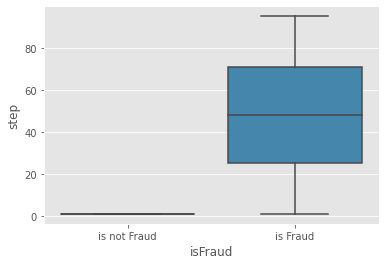

In [31]:
sns.boxplot(data=df,x='isFraud',y='step')

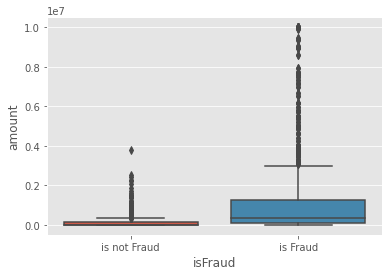

In [32]:
sns.boxplot(data=df,x='isFraud',y='amount')

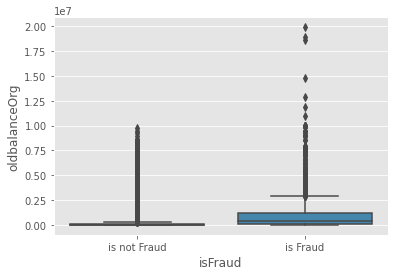

In [33]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

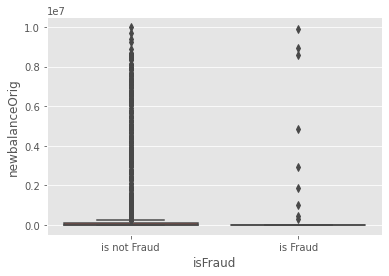

In [34]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

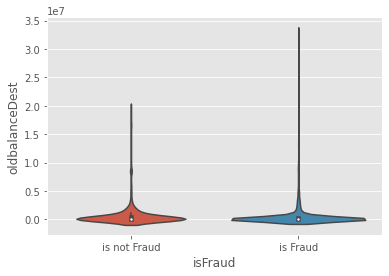

In [35]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

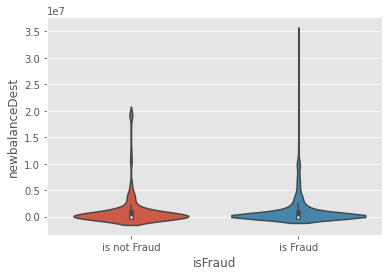

In [36]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

### activity5: Descriptive analysis


In [37]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,2430.000000,2430,2.430000e+03,2430,2.430000e+03,2.430000e+03,2430,2.430000e+03,2.430000e+03,2430
unique,NaN,5,NaN,2430,NaN,NaN,1870,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1231006815,NaN,NaN,C1590550415,NaN,NaN,is not Fraud
freq,NaN,827,NaN,1,NaN,NaN,25,NaN,NaN,1288
mean,23.216049,NaN,6.258361e+05,NaN,9.849040e+05,4.392755e+05,NaN,5.797246e+05,1.127075e+06,NaN
std,29.933036,NaN,1.503866e+06,NaN,2.082361e+06,1.520978e+06,NaN,1.891192e+06,2.907401e+06,NaN
min,1.000000,NaN,8.730000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.000000,NaN,9.018493e+03,NaN,8.679630e+03,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,1.000000,NaN,1.058692e+05,NaN,8.096250e+04,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
75%,45.000000,NaN,4.096098e+05,NaN,7.606258e+05,1.247804e+04,NaN,3.096195e+05,9.658701e+05,NaN


## Data Preprocessing

In [38]:
# Shape of csv data
df.shape

(2430, 10)

In [39]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [40]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud
3,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,is not Fraud
4,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,is not Fraud


### Activity 1: Checking for null values


In [41]:
# Finding null values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2430 non-null   int64  
 1   type            2430 non-null   object 
 2   amount          2430 non-null   float64
 3   oldbalanceOrg   2430 non-null   float64
 4   newbalanceOrig  2430 non-null   float64
 5   oldbalanceDest  2430 non-null   float64
 6   newbalanceDest  2430 non-null   float64
 7   isFraud         2430 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 152.0+ KB


### Activity 2: Handling outliers


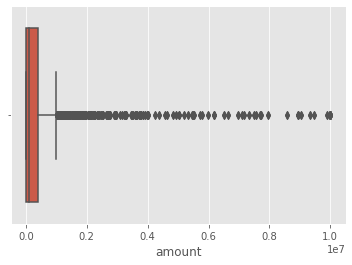

In [43]:
sns.boxplot(df['amount'])

## Remove the Outliers

In [46]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=array([10000000.]), count=array([14]))
625836.0974156379


In [47]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 : 9018.4925
q3 : 409609.8225
IQR : 400591.33
Upper Bound : 1010496.8175
Lower Bound : -591868.5025
Skewed data : 354
Skewed data : 0


In [48]:
# To handle outliers transformation techniques are used.

def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)

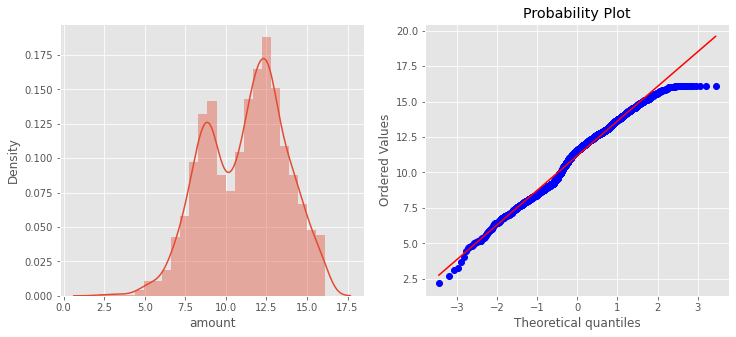

In [49]:
transformationPlot(np.log(df['amount']))

In [50]:
df['amount']=np.log(df['amount'])

### Activity 3: Object data labelencoding
 

In [51]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [52]:
df['type'].value_counts()

1    827
4    724
3    580
0    224
2     75
Name: type, dtype: int64

## dividing the dataset into dependent and independent y and x respectively

In [53]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [54]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,3,9.364617,41554.00,29885.86,0.00,0.00
3,1,3,8.964147,53860.00,46042.29,0.00,0.00
4,1,3,8.868944,183195.00,176087.23,0.00,0.00
...,...,...,...,...,...,...,...
2425,95,1,10.946325,56745.14,0.00,51433.88,108179.02
2426,95,4,10.424558,33676.59,0.00,0.00,0.00
2427,95,1,10.424558,33676.59,0.00,0.00,33676.59
2428,95,4,11.385084,87999.25,0.00,0.00,0.00


In [55]:
y

0       is not Fraud
1       is not Fraud
2       is not Fraud
3       is not Fraud
4       is not Fraud
            ...     
2425        is Fraud
2426        is Fraud
2427        is Fraud
2428        is Fraud
2429        is Fraud
Name: isFraud, Length: 2430, dtype: object

### Activity 4: Splitting data into train and test
 

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1944, 7)
(486, 7)
(486,)
(1944,)


## Model Building

### activity1.Random Forest classifier¶

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9958847736625515

In [59]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy


1.0

In [60]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,232,2
is not Fraud,0,252


In [61]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      1.00       234
is not Fraud       0.99      1.00      1.00       252

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



### activity2.Decision tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy


0.9917695473251029

In [63]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy


1.0

In [64]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,231,3
is not Fraud,1,251


In [65]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      0.99       234
is not Fraud       0.99      1.00      0.99       252

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



### activity3.ExtraTrees Classifier

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy


0.9938271604938271

In [67]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy


1.0

In [68]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,231,3
is not Fraud,0,252


In [69]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       1.00      0.99      0.99       234
is not Fraud       0.99      1.00      0.99       252

    accuracy                           0.99       486
   macro avg       0.99      0.99      0.99       486
weighted avg       0.99      0.99      0.99       486



### activity4. SupportVectorMachine Classifier

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.7901234567901234

In [71]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.8009259259259259

In [72]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,132,102
is not Fraud,0,252


In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       1.00      0.56      0.72       234
is not Fraud       0.71      1.00      0.83       252

    accuracy                           0.79       486
   macro avg       0.86      0.78      0.78       486
weighted avg       0.85      0.79      0.78       486



In [74]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [75]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [76]:
y_test1=la.transform(y_test)

In [77]:
y_test1

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [78]:
y_train1

array([0, 1, 0, ..., 1, 1, 0])

### activity5.xgboost Classifier

In [79]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy


0.9958847736625515

In [80]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy


1.0

In [81]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,232,2
1,0,252


In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       234
           1       0.99      1.00      1.00       252

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486



### Compare Models

In [83]:
def compareModel():
    print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svcc",accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1",accuracy_score(y_test_predict5,y_test1))

In [84]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9958847736625515
train accuracy for dtc 1.0
test accuracy for dtc 0.9917695473251029
train accuracy for etc 1.0
test accuracy for etc 0.9938271604938271
train accuracy for svc 0.8009259259259259
test accuracy for svcc 0.7901234567901234
train accuracy for xgb1 1.0
test accuracy for xgb1 0.9958847736625515


In [85]:
import pickle
pickle.dump(svc,open('payments.pkl','wb'))

In [86]:
pwd

'/content'

In [87]:
df.head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.00,160296.36,0.0,0.00,is not Fraud
1,1,3,7.530630,21249.00,19384.72,0.0,0.00,is not Fraud
2,1,3,9.364617,41554.00,29885.86,0.0,0.00,is not Fraud
3,1,3,8.964147,53860.00,46042.29,0.0,0.00,is not Fraud
4,1,3,8.868944,183195.00,176087.23,0.0,0.00,is not Fraud
5,1,3,8.969751,176087.23,168225.59,0.0,0.00,is not Fraud
6,1,3,8.300121,2671.00,0.00,0.0,0.00,is not Fraud
7,1,2,8.582563,41720.00,36382.23,41898.0,40348.79,is not Fraud
8,1,2,9.174189,4465.00,0.00,10845.0,157982.12,is not Fraud
9,1,3,8.039148,20771.00,17671.03,0.0,0.00,is not Fraud


In [88]:
df.tail(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2410,94,4,14.590090,2169679.91,0.0,0.00,0.00,is Fraud
2411,94,1,14.590090,2169679.91,0.0,0.00,2169679.91,is Fraud
2412,94,4,14.190236,1454592.61,0.0,0.00,0.00,is Fraud
2413,94,1,14.190236,1454592.61,0.0,264042.92,1718635.53,is Fraud
2414,94,4,13.040363,460635.82,0.0,0.00,0.00,is Fraud
2415,94,1,13.040363,460635.82,0.0,544728.69,1005364.51,is Fraud
2416,94,4,14.688284,2393539.65,0.0,0.00,0.00,is Fraud
2417,94,1,14.688284,2393539.65,0.0,5157128.07,7550667.73,is Fraud
2418,94,4,13.006408,445257.43,0.0,0.00,0.00,is Fraud
2419,94,1,13.006408,445257.43,0.0,0.00,445257.43,is Fraud


In [89]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[1,3,9.194174,170136.00,160296.36,0.0,0.00]])
print(svc.predict(features))

['is not Fraud']


In [90]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[94,4,14.590090,2169679.91,0.0,0.00,0.00]])
print(svc.predict(features))

['is Fraud']


In [91]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[1,2,9.138070,11299.00,1996.21,29832.0,16896.70]])
print(svc.predict(features))

['is not Fraud']


In [92]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[94,1,14.190236,1454592.61,0.0,264042.92,1718635.53]])
print(svc.predict(features))

['is Fraud']
